# Dealing with missing values

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 1. Drop that column completely

In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.drop('deck', axis=1, inplace=True)

In [11]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# 2- Filling missing values of age column by the mean of age

In [12]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

# Binning

<Axes: xlabel='age', ylabel='Count'>

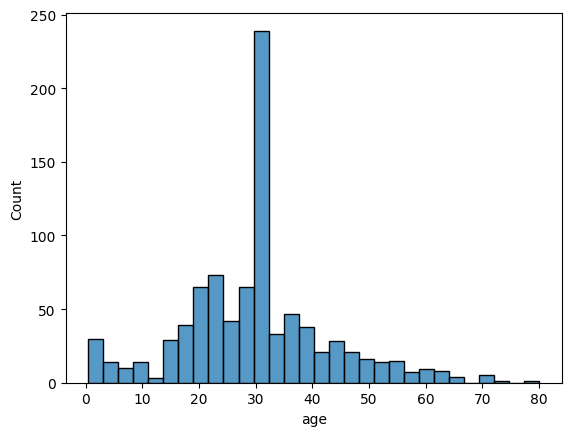

In [13]:
sns.histplot(df['age'])

In [15]:
# binning of age column into 7 categories
bins = [0,1,5,12,18,30,50,80]
labels = ['infants', 'todlars', 'kids', 'teens', 'youngs', 'middleAge', 'old']
# kis column ko bins banana hai
pd.cut(df['age'], bins=bins, labels=labels)

0         youngs
1      middleAge
2         youngs
3      middleAge
4      middleAge
         ...    
886       youngs
887       youngs
888       youngs
889       youngs
890    middleAge
Name: age, Length: 891, dtype: category
Categories (7, object): ['infants' < 'todlars' < 'kids' < 'teens' < 'youngs' < 'middleAge' < 'old']

# Feature Engineering kisi new column ko banao base on other column


In [16]:
bins = [0,1,5,12,18,30,50,80]
labels = ['infants', 'todlars', 'kids', 'teens', 'youngs', 'middleAge', 'old']
# kis column ko bins banana hai
df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middleAge
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middleAge
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middleAge


In [17]:
# rename a clumn
df.rename(columns={'binned_age':'newAgeGroup'}, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,newAgeGroup
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middleAge
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middleAge
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middleAge


In [18]:
df.groupby('newAgeGroup')['survived'].sum()

C:\Users\toshiba\AppData\Local\Temp\ipykernel_469940\3171380454.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('newAgeGroup')['survived'].sum()


newAgeGroup
infants       12
todlars       19
kids           9
teens         30
youngs       148
middleAge    102
old           22
Name: survived, dtype: int64

In [25]:
# Question: How many
# passengers in the Titanic dataset were 
# traveling alone (i.e., had no family members,
# i.e., neither parents/children nor 
# siblings/spouse) and what was their survival rate?
alonePassenger = df[df['sibsp'] == 0]
alonePassenger = alonePassenger[alonePassenger['survived'] == 1]
alonePassenger['survived'].count()

210

In [29]:
# averageAge = df['age'].mean()
df.groupby('pclass')['age'].mean()

pclass
1    37.048118
2    29.866958
3    26.403259
Name: age, dtype: float64